# Aula 05 e 06 - Técnicas não supervisionadas

Professor: Luiz Frias 
- Email: l.frias@poli.ufrj.br
- Linkedin: in/luizfrias/
- Twitter: @lfdefrias

**Objetivo:** entendimento da aplicação das técnicas não supervisionadas à bases de dados de textos.

Nesta aula iremos utilizar o Scikit-Learn. Sua instalação pode ser feita com `$ conda install scikit-learn`

In [1]:
import spacy
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nlp = spacy.load("pt_core_news_md")

### Representação Vetorial de Documentos

A representação vetorial de textos transforma um corpus em uma matriz de `D` linhas, onde `D` é o número de documentos do corpus, e `N` colunas, onde `N` é o número de tokens únicos no vocabulário. Cada elemento `Wij` dessa matriz é um peso que associa a presença do token `j` no documento `i`. Este peso depende da representação escolhida.

Vamos explorar abaixo duas diferentes representações vetoriais para o nosso corpus, criado com frases curtas e poucos documentos para melhor visualização dos resultados.

In [3]:
dataset = ['Capitu, isto é, uma criatura mui particular, mais mulher do que eu era homem.',
          'Não há alegria pública que valha uma boa alegria particular.',
          'O acaso é um Deus e um diabo ao mesmo tempo.',
          "Está morto: podemos elogiá-lo à vontade.",
          'Não se ama duas vezes a mesma mulher.',
          'Dormir é um modo interino de morrer.',
          'Tudo é aliado do homem que sabe querer.']

#### TF

TF = Term-frequency

Os pesos `Wij` representam a contagem do token `j` no documento `i`.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

A classe `CountVectorizer` permite fazer a transformação de uma lista de textos para o espaço vetorial.

In [5]:
tf = CountVectorizer()
tf_matrix = tf.fit_transform(dataset)

In [6]:
tf_matrix

<7x46 sparse matrix of type '<class 'numpy.int64'>'
	with 55 stored elements in Compressed Sparse Row format>

O método `get_feature_names` retorna os tokens únicos no vocabulário. 

Repare que as pontuações não estão presentes. Isso ocorre porque o método padrão de pré-processamento desta classe trabalha para retirá-las.

In [7]:
tf.get_feature_names()

['acaso',
 'alegria',
 'aliado',
 'ama',
 'ao',
 'boa',
 'capitu',
 'criatura',
 'de',
 'deus',
 'diabo',
 'do',
 'dormir',
 'duas',
 'elogiá',
 'era',
 'está',
 'eu',
 'homem',
 'há',
 'interino',
 'isto',
 'lo',
 'mais',
 'mesma',
 'mesmo',
 'modo',
 'morrer',
 'morto',
 'mui',
 'mulher',
 'não',
 'particular',
 'podemos',
 'pública',
 'que',
 'querer',
 'sabe',
 'se',
 'tempo',
 'tudo',
 'um',
 'uma',
 'valha',
 'vezes',
 'vontade']

In [10]:
pd.DataFrame(tf_matrix.toarray(), columns=tf.get_feature_names())

,acaso,alegria,aliado,ama,ao,boa,capitu,criatura,de,deus,...,querer,sabe,se,tempo,tudo,um,uma,valha,vezes,vontade
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0


Podemos alterar o comportamento padrão do `CountVectorizer` para utilizar o nosso próprio tokenizador e a nossa lista de stop_words.

Primeiramente, vamos investigar qual a lista de stopwords é disponibilizada pelo Spacy.

In [37]:
nlp.Defaults.stop_words

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

In [12]:
len(nlp.Defaults.stop_words)

413

Podemos adicionar elementos à essa lista. Como a lista é um `set`, a sintaxe para adicionar múltiplos elementos é feita com o operador `|`

In [28]:
nlp.Defaults.stop_words |= {'a', 'o', 'e'}

In [29]:
len(nlp.Defaults.stop_words)

416

A seguir exploramos os parâmetros esperados pela classe para utilizar nossa própria função de tokenização, que irá filtrar stopwords e pontuações, retornando os lemas das palavras. Além disso, utilizamos os parâmetros `min_df` e `max_df` para filtrar pelas palavras que aparecem em pelo menos 10% dos documentos e em menos de 90% deles. Isso possibilita filtrar por palavras muito raras ou muito comuns no corpus, o que poderia criar distorções em modelos de clusterização ou collocations, por exemplo.

In [34]:
tf = CountVectorizer(
    tokenizer=lambda doc: [t.lemma_.lower() for t in nlp(doc) if not (t.is_stop or t.is_punct)], 
    lowercase=False,
    stop_words=list(nlp.Defaults.stop_words),
    min_df=0.1, max_df=0.9
)
tf_matrix = tf.fit_transform(dataset)

In [35]:
pd.DataFrame(tf_matrix.toarray(), columns=tf.get_feature_names())

,acaso,alegria,aliar,amo,capitu,criatura,deus,diabo,dormir,elogiá-lo,...,modo,morrer,morto,mui,mulher,particular,público,querer,valer,vontade
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### TFIDF

TFIDF = Term-frequency Inverse Document Frequency

Os pesos `Wij` representam a contagem do token `j` no documento `i` ponderados pela proporção com que aparecem no restante dos documentos do corpus. A ideia com isso é dar menos importância à palavras muito comuns em toda a base de dados.

O scikit-learn disponibiliza duas classes para essa transformação: `TfidfVectorizer` e `TfidfTransformer`. Em resumo, a primeira faz o processo de transformação vetorial a partir de uma lista de documentos, enquanto a segunda faz a partir de uma representação vetorial de contagens.

Em suma, TfidfVectorizer = CountVectorizer => TfidfTransformer.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    tokenizer=lambda doc: [t.lemma_.lower() for t in nlp(doc) if not (t.is_stop or t.is_punct)], 
    lowercase=False,
    stop_words=list(nlp.Defaults.stop_words),
    min_df=0.1, max_df=0.9,
    norm='l2', 
    use_idf=True, 
)
tfidf_matrix = tfidf.fit_transform(dataset)

pd.DataFrame(np.round(tfidf_matrix.toarray(), 2), columns=tfidf.get_feature_names())

,acaso,alegria,aliar,amo,capitu,criatura,deus,diabo,dormir,elogiá-lo,...,modo,morrer,morto,mui,mulher,particular,público,querer,valer,vontade
0,0.00,0.00,0.00,0.00,0.44,0.44,0.00,0.00,0.0,0.00,...,0.0,0.0,0.00,0.44,0.37,0.37,0.00,0.00,0.00,0.00
1,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.00,0.30,0.36,0.00,0.36,0.00
2,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.58,0.0,0.00,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.58,...,0.0,0.0,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.58
4,0.00,0.00,0.00,0.77,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.64,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.00,...,0.5,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.61,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.61,0.00,0.00


#### Carregando um corpus

Vamos explorar na prática a utilização da representação vetorial em corpus textual. Para isso, vamos utilizar os discursos do presidente da Câmara de Deputados, Rodrigo Maia. Este corpus foi montado na nossa primeira aula.

In [44]:
discursos_maia = pd.read_csv('out/discursos-maia.csv', sep='|')
discursos_maia.head(3)

,dataHoraInicio,tipoDiscurso,keywords,sumario,transcricao
0,2020-08-26T11:52,HOMENAGEM,"SESSÃO CONJUNTA, HOMENAGEM, PROMULGAÇÃO, PEC 1...",Saudações aos Parlamentares presentes e aos pa...,O SR. RODRIGO MAIA (DEM - RJ. Para discursar. ...
1,2020-08-20T18:40,ORIENTAÇÃO DE BANCADA,"MANUTENÇÃO, VETO 17/2020, VETO PARCIAL, PLP 3...",Importância de preservação do teto de gastos p...,O SR. RODRIGO MAIA (DEM - RJ. Para orientar a ...
2,2020-07-20T19:40,FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA,"DECISÃO DO PRESIDENTE DA CÂMARA DOS DEPUTADOS,...",Decisão da Presidência sobre a questão de orde...,O SR. PRESIDENTE (Rodrigo Maia. Bloco/DEM - RJ...


In [59]:
tfidf = TfidfVectorizer(
    tokenizer=lambda doc: [t.lemma_.lower() for t in nlp(doc) if not (t.is_stop or t.is_punct or t.is_digit)], 
    lowercase=False,
    stop_words=list(nlp.Defaults.stop_words),
    min_df=0.1, max_df=0.9,
    norm='l2', 
    use_idf=True, 
)
tfidf_matrix = tfidf.fit_transform(discursos_maia.transcricao.tolist())

In [60]:
tfidf_matrix

<31x337 sparse matrix of type '<class 'numpy.float64'>'
	with 2281 stored elements in Compressed Sparse Row format>

In [62]:
pd.DataFrame(np.round(tfidf_matrix.toarray(), 2), columns=tfidf.get_feature_names()).head(2)

,achar,acho,acompanhar,acordar,acreditar,acredito,administrativo,agendar,agradecer,agradeço,...,v.exa,verdade,vidar,vir,visto,viver,voltar,votar,votação,único
0,0.00,0.0,0.1,0.00,0.0,0.0,0.04,0.0,0.00,0.00,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.04,0.02,0.0
1,0.13,0.0,0.0,0.03,0.0,0.0,0.04,0.0,0.07,0.04,...,0.0,0.0,0.03,0.03,0.06,0.0,0.0,0.06,0.05,0.0


### Similarity

Nesta seção vamos explorar como as representações vetoriais podem ser utilizadas para calcular a similaridade entre documentos textuais.

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.000000,0.362406,0.011652,0.073572,0.210378,0.263500,0.253288,0.144847,0.218421,0.092888,...,0.020337,0.383359,0.112911,0.087799,0.045886,0.000000,0.106348,0.177183,0.427133,0.128136
1,0.362406,1.000000,0.064250,0.059527,0.298328,0.282425,0.529496,0.335219,0.305968,0.116331,...,0.045694,0.527869,0.075817,0.095768,0.188630,0.019441,0.154995,0.194955,0.385645,0.076462
2,0.011652,0.064250,1.000000,0.255622,0.062493,0.229671,0.111498,0.105167,0.122591,0.126815,...,0.206924,0.070654,0.230019,0.056058,0.097757,0.215905,0.079391,0.171168,0.084207,0.131506
3,0.073572,0.059527,0.255622,1.000000,0.100769,0.103896,0.099592,0.205510,0.080213,0.134392,...,0.291995,0.035774,0.316844,0.071797,0.033143,0.212404,0.028528,0.078057,0.092220,0.016910
4,0.210378,0.298328,0.062493,0.100769,1.000000,0.230254,0.319632,0.199240,0.377456,0.155033,...,0.064132,0.314375,0.025977,0.089130,0.207529,0.037338,0.116306,0.169633,0.353463,0.240905
5,0.263500,0.282425,0.229671,0.103896,0.230254,1.000000,0.333033,0.221045,0.284326,0.136090,...,0.100050,0.291552,0.303558,0.132206,0.117203,0.056489,0.197469,0.350949,0.286807,0.105425
6,0.253288,0.529496,0.111498,0.099592,0.319632,0.333033,1.000000,0.317617,0.327636,0.132063,...,0.083326,0.417802,0.090713,0.149304,0.154774,0.126950,0.262554,0.244884,0.379147,0.125472
7,0.144847,0.335219,0.105167,0.205510,0.199240,0.221045,0.317617,1.000000,0.115260,0.082188,...,0.029450,0.163398,0.094142,0.112668,0.124468,0.077608,0.079975,0.111408,0.203587,0.044846
8,0.218421,0.305968,0.122591,0.080213,0.377456,0.284326,0.327636,0.115260,1.000000,0.133617,...,0.060846,0.325709,0.083021,0.225353,0.167160,0.047640,0.191954,0.141053,0.317363,0.202394
9,0.092888,0.116331,0.126815,0.134392,0.155033,0.136090,0.132063,0.082188,0.133617,1.000000,...,0.236430,0.095092,0.218608,0.135927,0.187160,0.099928,0.063345,0.219141,0.231170,0.233985


Tipos de discurso, ordenados em similaridade em relação ao documento 0

In [121]:
pd.concat([
    similarity_df[0].sort_values(),
    discursos_maia.loc[similarity_df[0].sort_values().index].tipoDiscurso,
    discursos_maia.loc[similarity_df[0].sort_values().index].transcricao.str.len()
], axis=1)

,0,tipoDiscurso,transcricao
26,0.000000,FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA,264
17,0.003173,FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA,243
2,0.011652,FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA,352
21,0.020337,FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA,1567
25,0.045886,FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA,1138
3,0.073572,FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA,532
24,0.087799,FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA,1578
15,0.092819,FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA,1045
9,0.092888,FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA,4223
27,0.106348,FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA,1417


### Cluster

A matriz de similaridade pode ser utilizada para clusterizar os documentos textuais.

In [78]:
discursos_maia.tipoDiscurso.value_counts()

FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA    20
HOMENAGEM                                             4
PELA ORDEM                                            3
ORIENTAÇÃO DE BANCADA                                 2
COMISSÃO GERAL                                        1
OUTROS                                                1
Name: tipoDiscurso, dtype: int64

In [80]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, 
    max_iter=10000, 
    n_init=50, 
    random_state=42
).fit(similarity_matrix)
km.labels_

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1,
       0, 1, 2, 2, 1, 2, 2, 0, 2], dtype=int32)

In [81]:
discursos_maia['cluster'] = km.labels_

In [84]:
discursos_maia[['tipoDiscurso', 'cluster']].value_counts()

tipoDiscurso                                       cluster
FALA DO PRESIDENTE OU NO EXERCÍCIO DA PRESIDÊNCIA  2          9
                                                   1          6
                                                   0          5
HOMENAGEM                                          0          4
PELA ORDEM                                         0          3
OUTROS                                             0          1
ORIENTAÇÃO DE BANCADA                              2          1
                                                   0          1
COMISSÃO GERAL                                     0          1
dtype: int64

In [105]:
def get_cluster_text(clusterid):
    docs = discursos_maia[discursos_maia.cluster == clusterid].transcricao.tolist()

    all_tokens = []
    for doc in docs:
        tokens = [t.lemma_.lower() for t in nlp(doc) if t.lemma_.lower() in tfidf.get_feature_names()]
        all_tokens.extend(tokens)

    text = " ".join(tokens)
    return text

Pode-se notar que, ao escolher 3 clusters, o Kmeans separou no primeiro cluster os discursos do Rodrigo Maia relacionados ao país (brasileiro, modernizar, país, investir, ...), no segundo ficaram os discursos breves, como abertura de seções, e no terceiro os discursos voltados para a própria Câmara (deputado, mesa, representante, presidência, ...)

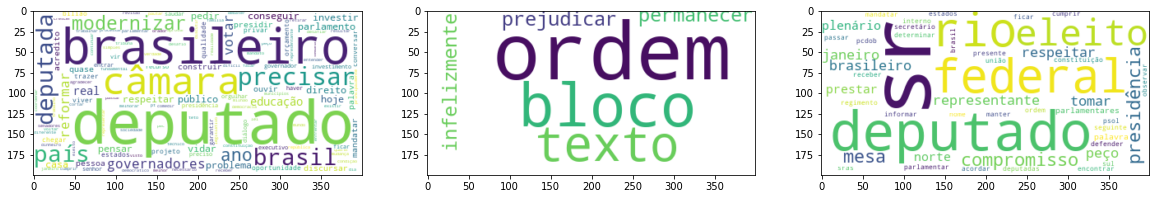

In [106]:
from wordcloud import WordCloud

wc1 = WordCloud(background_color="white").generate(get_cluster_text(0))
wc2 = WordCloud(background_color="white").generate(get_cluster_text(1))
wc3 = WordCloud(background_color="white").generate(get_cluster_text(2))

fig, axs = plt.subplots(1, 3, figsize=(20, 20))
axs = axs.flatten()
axs[0].imshow(wc1, interpolation='bilinear')
axs[1].imshow(wc2, interpolation='bilinear')
axs[2].imshow(wc3, interpolation='bilinear')

Discursos classificados no primeiro cluster.

In [111]:
discursos_maia[discursos_maia['cluster'] == 0].sumario.tolist()

['Saudações aos Parlamentares presentes e aos participantes na sessão virtual. Importância da promulgação da Emenda Constitucional nº 108, de 2020, sobre a transformação do Fundo de Manutenção e Desenvolvimento da Educação Básica e de Valorização dos Profissionais da Educação - FUNDEB, em instrumento permanente de financiamento da educação básica pública. Avanço do Parlamento brasileiro na votação de proposições destinadas à modernização do Estado brasileiro.',
 'Importância de preservação do teto de gastos públicos. Apoio à realização da reforma tributária. Defesa de manutenção do Veto Parcial nº 17, de 2020, aposto ao Projeto de Lei Complementar nº 39, de 2020, sobre o estabelecimento do Programa Federativo de Enfrentamento ao Coronavírus, e a alteração da Lei Complementar nº 101, de 2000, (progressão funcional e reajuste salarial de servidores públicos).',
 'Gravidade da crise sanitária decorrente da pandemia de coronavírus no País. Solidariedade do Parlamento brasileiro aos familia

Discursos classificados no terceiro cluster.

In [109]:
discursos_maia[discursos_maia['cluster'] == 2].sumario.tolist()

['Votação pelo Plenário da decisão da questão de ordem da Presidência, a favor da maioria absoluta de votos para manutenção da Comunicação de Medida Cautelar nº 1, de 2020, do Supremo Tribunal Federal, acerca do afastamento do Deputado Wilson Santiago.',
 'Esclarecimento ao Plenário, em especial a Deputado do Estado da Paraíba, sobre a celebração de acordo para a votação da Proposta de Emenda à Constituição nº 6, de 2019, acerca da reforma da Previdência Social. Defesa de votação do Projeto de Lei nº 5.478, de 2019, sobre o estabelecimento de critérios de distribuição dos valores arrecadados com os leilões dos volumes excedentes ao limite referido no § 2º do art. 1º da Lei nº 12.276, de 2010. Orientação de bancada na votação do Projeto de Lei do Congresso Nacional nº 18, de 2019, sobre abertura dos Orçamentos Fiscal e da Seguridade Social da União, em favor de diversos órgãos do Poder Executivo, crédito suplementar no valor de R$ 3.041.594.744,00, para reforço de dotações constantes da

### Topic Model

O modelo de tópicos é responsável por inferir, a partir de uma coleção de documentos, a distribuição de palavras que compoem um tópicos, e a distribuição de tópicos que compoem o documento.

In [3]:
import en_core_web_md

In [4]:
nlp_en = en_core_web_md.load()

In [5]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [12]:
glob.glob('in/bbc/*')

['in/bbc/entertainment',
 'in/bbc/business',
 'in/bbc/sport',
 'in/bbc/politics',
 'in/bbc/README.TXT',
 'in/bbc/tech']

In [6]:
import os, glob, codecs

bbc_corpus = []

for _dir in glob.glob('in/bbc/*'):
    for fname in glob.glob(_dir + '/*.txt'):
        category, text = os.path.split(_dir)[-1], codecs.open(fname, encoding='utf-8', errors='ignore').read()
        bbc_corpus.append([category, text])

In [17]:
bbc_df = pd.DataFrame(bbc_corpus, columns=['category', 'text'])
bbc_df.sample(n=5)

,category,text
2179,tech,US blogger fired by her airline\n\nA US airlin...
75,entertainment,BBC to pour £9m into new comedy\n\nThe BBC is ...
222,entertainment,Franz Ferdinand's art school lesson\n\nScottis...
1023,sport,Campbell lifts lid on United feud\n\nArsenal's...
1545,politics,Schools to take part in mock poll\n\nRecord nu...


In [13]:
N_TOPICS = 5

In [14]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

#### LDA

A Alocação Latente de Dirichlet é o modelo de tópico mais popular, entre os modelos probabilísticos. 

In [18]:
tf = TfidfVectorizer(
    tokenizer=lambda doc: [t.lower_ for t in nlp_en(doc) if not (t.is_stop or t.is_punct or t.is_digit)], 
    lowercase=False,
    stop_words=list(nlp_en.Defaults.stop_words),
    min_df=0.1, max_df=0.9,
    use_idf=False
)
tf_matrix = tf.fit_transform(bbc_df.text.tolist())

/opt/miniconda3/envs/text/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'll', 'm', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [23]:
tf_matrix.shape

(2225, 142)

In [19]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=N_TOPICS,
                                max_iter=500, 
                                random_state=42)
document_topics = lda.fit_transform(tf_matrix)

Matriz de documentos x tópicos

In [26]:
document_topics.shape

(2225, 5)

Matriz de tópicos x termos

In [27]:
lda.components_.shape

(5, 142)

In [31]:
bbc_df['LDA'] = np.argmax(document_topics, axis=1)

Pelas contagens abaixo podemos relacionar o resultado da LDA com a anotação humana da base de dados. 

In [32]:
bbc_df.value_counts(subset=['category', 'LDA'])

category       LDA
sport          4      422
politics       1      306
tech           0      289
business       2      276
entertainment  3      188
business       0      159
entertainment  0      103
politics       0       87
business       1       71
sport          2       59
entertainment  2       52
tech           4       47
               1       30
sport          0       27
tech           2       25
entertainment  4       24
politics       2       20
entertainment  1       19
tech           3       10
politics       4        4
business       4        4
sport          3        2
               1        1
dtype: int64

Podemos inspecionar as principais palavras de cada tópico.

In [34]:
print_top_words(lda, tf.get_feature_names(), 10)

Topic #0: said people new music mr technology year use uk like
Topic #1: film best year said won director number uk new including
Topic #2: said game time england win world play team players year
Topic #3: said mr government labour people party minister told new public
Topic #4: said $ m year £ company market new growth firm



In [35]:
pyLDAvis.sklearn.prepare(lda, tf_matrix, tf, mds='mmds')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.083450  0.103918       1        1  23.598605
4     -0.071739 -0.104353       2        1  22.995345
0     -0.069502 -0.009644       3        1  22.109525
3     -0.093471  0.086552       4        1  21.126861
1      0.151262 -0.076473       5        1  10.169664, topic_info=       Term        Freq       Total Category  logprob  loglift
40     film  108.000000  108.000000  Default  30.0000  30.0000
90       mr  232.000000  232.000000  Default  29.0000  29.0000
10     best   97.000000   97.000000  Default  28.0000  28.0000
0         $  116.000000  116.000000  Default  27.0000  27.0000
68   labour   60.000000   60.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
138   world   13.863720  120.438616   Topic5  -4.1160   0.1239
112    said   32.386521  695.027736   Topic5  -3.2675  -0.7804
125    time   11.118014  132.275876   Topic5  -4.3367  -0.1906
135     win    7.338873   65.570548   Topic5  -4.7521   0.0958
80        m    8.814510  139.955096   Topic5  -4.5689  -0.4792

[226 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         2  0.932308     $
0         3  0.059873     $
1         1  0.230365  able
1         2  0.098728  able
1         3  0.460729  able
...     ...       ...   ...
141       1  0.032148     £
141       2  0.642953     £
141       3  0.096443     £
141       4  0.192886     £
141       5  0.040185     £

[557 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 4, 2])

#### NMF

A fatoração de matrizes não-negativas é o modelo mais popular entre os modelos baseados em fatoração de matrizes.

In [20]:
from sklearn.decomposition import NMF

In [21]:
tfidf = TfidfVectorizer(
    tokenizer=lambda doc: [t.lower_ for t in nlp_en(doc) if not (t.is_stop or t.is_punct or t.is_digit)], 
    lowercase=False,
    stop_words=list(nlp_en.Defaults.stop_words),
    min_df=0.1, max_df=0.9,
    norm='l2',
    use_idf=True,
    smooth_idf=True
)
tfidf_matrix = tfidf.fit_transform(bbc_df.text.tolist())

In [36]:
tfidf_matrix.shape

(2225, 142)

In [22]:
nmf = NMF(n_components=N_TOPICS, 
        solver='cd', 
        max_iter=500,
        random_state=42)
document_topics = nmf.fit_transform(tfidf_matrix)

In [37]:
print_top_words(nmf, tfidf.get_feature_names(), 10)

Topic #0: said people new uk technology year music use service million
Topic #1: mr labour said party government minister told public plans britain
Topic #2: m $ £ company firm year deal market said business
Topic #3: film best director won british including year life london uk
Topic #4: game england win play players games team time half final



In [38]:
pyLDAvis.sklearn.prepare(nmf, tfidf_matrix, tfidf, mds='mmds')

/opt/miniconda3/envs/text/lib/python3.6/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/opt/miniconda3/envs/text/lib/python3.6/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/opt/miniconda3/envs/text/lib/python3.6/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.056186  0.066569       1        1  30.407976
4     -0.002331 -0.206167       2        1  22.871532
1     -0.266891 -0.021615       3        1  19.575520
2      0.074081  0.247203       4        1  18.314114
3      0.251327 -0.085990       5        1   8.830857, topic_info=      Term        Freq       Total Category  logprob  loglift
40    film  187.000000  187.000000  Default  30.0000  30.0000
90      mr  271.000000  271.000000  Default  29.0000  29.0000
0        $  180.000000  180.000000  Default  28.0000  28.0000
80       m  217.000000  217.000000  Default  27.0000  27.0000
10    best  111.000000  111.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
139   year   16.310358  140.498652   Topic5  -3.8415   0.2735
94     new    8.039687  126.746693   Topic5  -4.5489  -0.3309
138  world    5.998647   95.857948   Topic5  -4.8418  -0.3444
80       m    6.220775  217.808088   Topic5  -4.8054  -1.1288
112   said    6.010738  330.441322   Topic5  -4.8398  -1.5800

[220 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         4  1.001223          $
1         1  0.646237       able
1         2  0.193871       able
1         3  0.161559       able
2         1  0.752971  according
...     ...       ...        ...
140       5  0.130664      years
141       1  0.047486          £
141       3  0.135674          £
141       4  0.786906          £
141       5  0.033918          £

[474 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 3, 4])

Vamos escolher um documento de exemplo da base, ler seu texto e ver sua distribuição de tópicos atribuída pelo modelo.

In [39]:
bbc_df.iloc[40]

category                                        entertainment
text        Oscar nominee Dan O'Herlihy dies\n\nIrish acto...
LDA                                                         3
Name: 40, dtype: object

In [40]:
print(bbc_df.iloc[40].text)

Oscar nominee Dan O'Herlihy dies

Irish actor Dan O'Herlihy, who was nominated for best actor at the 1955 Oscars, has died at the age of 85.

O'Herlihy, whose Oscar nomination was for Luis Bunuel's The Adventures of Robinson Crusoe, died at his home in Malibu, California, a spokesman said. The actor began his film career in the 1940s, playing Macduff to Orson Welles' Macbeth in 1948, and was also a regular in on the Dublin stage. He later appeared in Robocop and its sequel and cult TV show Twin Peaks. He played the CEO of Omni Consumer Products in 1987's Robocop and Robocop 2 three years later, and was saw mill owner Andrew Packard in Twin Peaks, also in 1990. Despite his Oscar nomination, he had few other lead roles and became a familiar supporting actor on TV and in film. The year he was nominated, the Academy Award was won by Marlon Brando for On the Waterfront.



In [42]:
document_topics[40]/np.sum(document_topics[40])

array([0.04286197, 0.03688983, 0.        , 0.8929948 , 0.02725339])

#### Bônus: recomendação de notícia

Supondo que um leitor da BBC estivesse lendo uma matéria, qual seria a próxima matéria a ser recomendada?

In [63]:
news_sim_tfidf = cosine_similarity(tfidf_matrix)
news_sim_topic = cosine_similarity(document_topics)

In [62]:
print(bbc_df.iloc[40].text)

Oscar nominee Dan O'Herlihy dies

Irish actor Dan O'Herlihy, who was nominated for best actor at the 1955 Oscars, has died at the age of 85.

O'Herlihy, whose Oscar nomination was for Luis Bunuel's The Adventures of Robinson Crusoe, died at his home in Malibu, California, a spokesman said. The actor began his film career in the 1940s, playing Macduff to Orson Welles' Macbeth in 1948, and was also a regular in on the Dublin stage. He later appeared in Robocop and its sequel and cult TV show Twin Peaks. He played the CEO of Omni Consumer Products in 1987's Robocop and Robocop 2 three years later, and was saw mill owner Andrew Packard in Twin Peaks, also in 1990. Despite his Oscar nomination, he had few other lead roles and became a familiar supporting actor on TV and in film. The year he was nominated, the Academy Award was won by Marlon Brando for On the Waterfront.



In [69]:
np.argsort(news_sim_tfidf[40])[:5], np.argsort(news_sim_topic[40])[:5]

(array([2224, 2135, 2000, 2133,  305]), array([757, 437, 764, 793, 102]))

In [75]:
print(bbc_df.iloc[764].text)

Ford gains from finance not cars

Ford, the US car company, reported higher fourth quarter and full-year profits on Thursday boosted by a buoyant period for its car loans unit.

Net income for 2004 was $3.5bn (£1.87bn) - up nearly $3bn from 2003 - while turnover rose $7.2bn to $170.8bn. In the fourth quarter alone Ford reported net income of $104m, compared with a loss of $793m a year ago. But its auto unit made a loss. Fourth quarter turnover was $44.7bn, compared to $45.9bn a year ago.

Though car and truck loan profits saved the day, Ford's auto unit made a pre-tax loss of $470m in the fourth quarter (compared to a profit of £13m in the year-ago period) and its US sales dipped 3.8%.

Yesterday General Motor's results also showed its finance unit was a strong contributor to profits. However, Ford is working hard to revitalise its product portfolio, unveiling the Fusion and Zephyr models at the International Motor Show in Detroit. It also brought out a number of new models in the seco

In [80]:
np.argsort(-news_sim_tfidf[40])[1:6], np.argsort(-news_sim_topic[40])[1:6]

(array([371, 105,   9,  27, 165]), array([296, 272, 289, 286, 314]))

In [278]:
bbc_df.loc[np.argsort(-news_sim_tfidf[40])[1:6]]

,category,text,LDA
371,entertainment,"Oscars steer clear of controversy\n\nThe Oscars nominations list has left out some of the most controversial films of the past year in favour of safer, less contentious cinema.\n\nIf best film nom...",1
105,entertainment,"Arthur Hailey: King of the bestsellers\n\nNovelist Arthur Hailey, who has died at the age of 84, was known for his bestselling page-turners exploring the inner workings of various industries, from...",1
9,entertainment,"Johnny Depp: The acting outlaw\n\nJohnny Depp, whose latest role was Peter Pan creator JM Barrie in Finding Neverland, is celebrated as one of Hollywood's most maverick talents. Depp has become an...",1
27,entertainment,"Tautou film tops Cesar prize nods\n\nFrench film A Very Long Engagement has received 12 nominations for France's Cesar film awards, despite a recent ruling it was ""not French enough"".\n\nThe World...",1
165,entertainment,"Brookside actress Keaveney dies\n\nActress Anna Keaveney, who appeared in Brookside, My Family and A Touch of Frost, has died of lung cancer aged 55.\n\nKeaveney, who played Brookside's Marie Jack...",1


In [81]:
print(bbc_df.iloc[371].text)

Oscars steer clear of controversy

The Oscars nominations list has left out some of the most controversial films of the past year in favour of safer, less contentious cinema.

If best film nominees were drawn on the basis of column inches, two of the front-runners would have had to be Michael Moore's Bush-baiting documentary Fahrenheit 9/11 and Mel Gibson's The Passion of the Christ. Both films polarised opinion but had critics talking, and the public turning up to see them - Fahrenheit 9/11 breaking US box office records for a documentary, and The Passion of the Christ making more than US$370m (£196m) in the US alone. But this year's Academy Awards have shied away from the big name controversies, with The Passion of the Christ - a film accused of being anti-Semitic - receiving nominations only in the 'minor' categories of cinematography, makeup and musical score.

Fahrenheit 9/11 has also been overlooked, despite winning the Palme d'Or at the Cannes International Film Festival in 2004

In [85]:
bbc_df.loc[np.argsort(-news_sim_topic[40])[1:6]].drop('LDA', axis=1)

,category,text
296,entertainment,Surprise win for anti-Bush film\n\nMichael Moo...
272,entertainment,Farrell due to make US TV debut\n\nActor Colin...
289,entertainment,Films on war triumph at Sundance\n\nA study of...
286,entertainment,Career honour for actor DiCaprio\n\nActor Leon...
314,entertainment,Singer's film to show at festival\n\nA documen...


In [86]:
print(bbc_df.iloc[296].text)

Surprise win for anti-Bush film

Michael Moore's anti-Bush documentary Fahrenheit 9/11 has won best film at the US People's Choice Awards, voted for by the US public.

Mel Gibson's The Passion of the Christ won best drama, despite both films being snubbed so far at US film awards in the run-up to February's Oscars. Julia Roberts won her 10th consecutive crown as favourite female movie star. Johnny Depp was favourite male movie star and Renee Zellweger was favourite leading lady at Sunday's awards in LA.

Film sequel Shrek 2 took three prizes - voted top animated movie, top film comedy and top sequel. In television categories, Desperate Housewives was named top new drama and Joey, starring former Friends actor Matt LeBlanc, was best new comedy. Long-running shows Will and Grace and CSI: Crime Scene Investigation were named best TV comedy and TV drama respectively.

Nominees for the People's Choice Awards were picked by a 6,000-strong Entertainment Weekly magazine panel, and winners were

In [91]:
news_sim_tfidf[40][296], news_sim_topic[40][296]

(0.6033813619308935, 0.9995039711606931)

In [93]:
document_topics[40] / document_topics[40].sum()

array([0.04286197, 0.03688983, 0.        , 0.8929948 , 0.02725339])

In [94]:
document_topics[296] / document_topics[296].sum()

array([0.03037595, 0.02181039, 0.        , 0.93856333, 0.00925033])